# Energy model of AN in connnected channels

This notebook is for presenting important predictions by Woodhouse and Dunkel 2017.
The theory starts with a Hamiltonian
$$
H_0 = \lambda\sum_{e\in E} V(\phi_e) + \frac{1}{2}\mu\sum_{v\in V} (\mathbf{D}\cdot\mathbf{\Phi})_v^2,
$$
where the first term on RHS is the sum of double-well potential of channel flows, dictating flow in each channel to prefer $\pm 1$ or 0. The second term is a soft imcompressible constraint, stating that the accumulation at each vertices should be minimized. The flow potential on edges, $V(\phi_e)$ is modeled as a 6-order Landau-type potential (V6), which show minima when $\phi_e=\pm 1$. 
$$
V(\phi_e) = - \frac{1}{4}\phi_e^4 + \frac{1}{6}\phi_e^6.
$$
However, it is worth noting that V6 is not the only possible model, but only one of the models that gives discrete minima at 1, 0, -1, which interests the authors. Another plausible model is the 4-order model (V4):
$$
V(\phi_e) = - \frac{1}{2}\phi_e^2 + \frac{1}{4}\phi_e^4.
$$

## 1 Single channel

The simplest example of a flow network is just a single channel. When considering this model, we do not need the incompressibility constraint, but only consider V6 or V4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output
from myimagelib.myImageLib import FastPeakFind
from skimage import io, draw

In [3]:
def flow_potential(phi, type="v6"):
    """Flow potential of edge flow. Double well.
    phi -- flow rate
    type -- v6 or v4, denoting two plausible models."""
    if type == "v6":
        return - 1 / 4 * phi ** 4 + 1/6 * phi**6
    elif type == "v4":
        return - 1 / 2 * phi ** 2 + 1/4 * phi**4

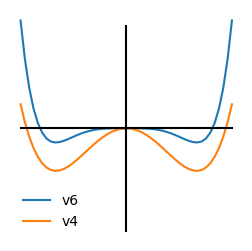

In [181]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
phi = np.linspace(-1.5, 1.5)
for v in ["v6", "v4"]:
    V = flow_potential(phi, type=v)
    ax.plot(phi, V, label=v)
ax.plot([-1.5, 1.5], [0, 0], color="black")
ax.plot([0, 0], [-0.6, 0.6], color="black")
ax.axis("off")
ax.legend(frameon=False)

## 2 Open networks -- input / output capabilities

To achieve logic operations, it is necessary to include input / output capabilities. In this model, this is achieved by adding a boundary vertex energy to the Hamitonian:

$$
H_{\partial\Gamma} = \frac{1}{2} \mu \sum_{v\in\partial\Gamma_{\text{in}}} [(\mathbf{D}\cdot\mathbf{\Phi})_v + I_v] ^2
$$

In experiment, input and output are achieved by ratchet channels. In addition to boundary energy, an diode energy should be added to input and output edges to further ensure that no spurious backflow happens, e.g. flow out from an input. The diode energy $H_+ = 0$ if $\phi_e < 0$ for any $e\in E_+$, and zero otherwise.

The total energy of a flow network can be written as:

$$
H = H_0 + H_{\partial\Gamma} + H_+
$$

## 3 Energy landscapes of specific bifurcation designs

The most straight forward numerical method to compute and visualize the energy landscape is to visit all the possible configurations of the flows, say $\phi_i\in[-2, 2]$ where $i\in\{A, B, C\}$, and calculate the energy corresponding to each. However, this approach involves too many unrealistic configurations, since we already know from experiments that the continuity at the junction node must hold. For example, configuration like [1, 1, 1], where in each channel AN goes outward is clearly not a favored state. To simplify the computation and to highlight the effect of the double-well potential, we only vary two of the three flow rates independently, and set the third flow rate according to continuity $\sum\phi_i=0$. For example, we can start by setting $\phi_A$ and $\phi_B$ at certain values, then $\phi_C$ can be computed as $\phi_C = -\phi_A - \phi_B$.

### 3.1 Fully symmetric straight channels (model_01_S)

Text(0, 0.5, '$\\phi_1$')

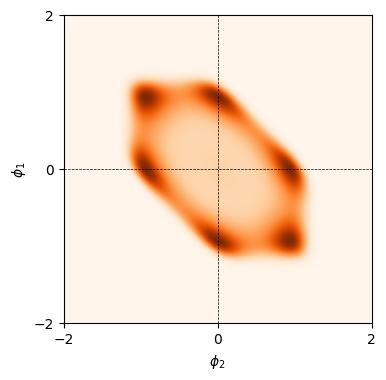

In [25]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20 # lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.2 Fully symmetric channels with 3 partial ratchets (model_02_S)

In [12]:
def h_diode(flow, direction):
    """
    flow -- flow rate value
    direction -- direction of diode, +1 or -1
    """
    if flow * direction > 0:
        return 0
    else:
        return np.inf

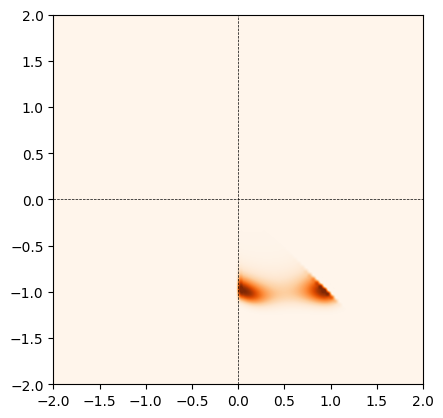

In [148]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20 # lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (2*flow_potential(p1, type="v6") + 2*flow_potential(p2, type="v6") + 2*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * ((p1+1)**2 + (p2-1)**2 + (p3-1)**2) + h_diode(p1, -1) + h_diode(p2, 1) +h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.3 Fully symmetric channels with 1 full ratchet (model_03_S)

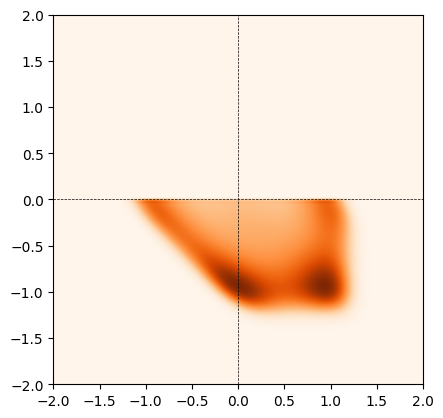

In [147]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.4 Asymmetric channels with 1 short outlet (model_04_L)

Text(0, 0.5, '$\\phi_1$')

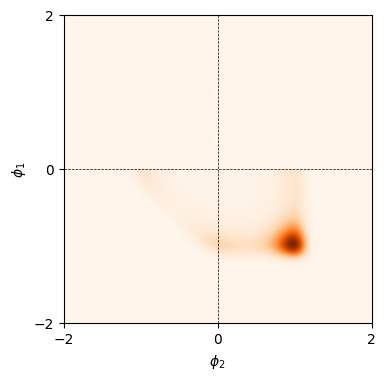

In [16]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + 3*flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.5 Asymmetric channels with 1 full ratchet (model_05_L)

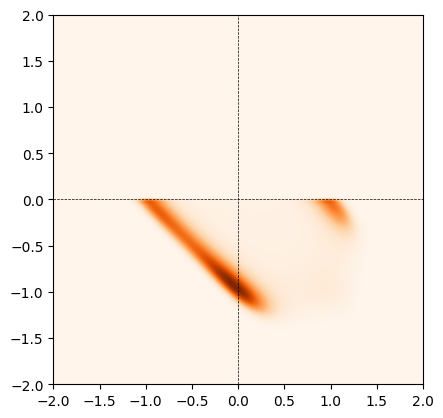

In [166]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.6 Asymmetric straight channels (model_06_L)

Text(0, 0.5, '$\\phi_1$')

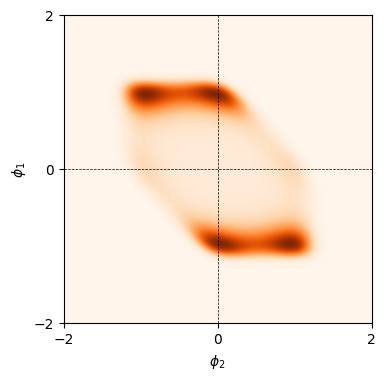

In [18]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.7 Asymmetric channels with 1 full ratchet, different angle (model_07_A)

Text(0, 0.5, '$\\phi_1$')

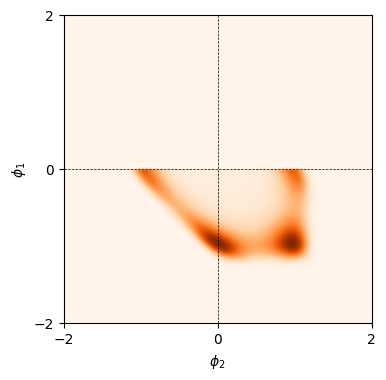

In [13]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")

ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.8 Asymmetric channels with 1 full ratchet, different angles and lengths, together (model_08_A)

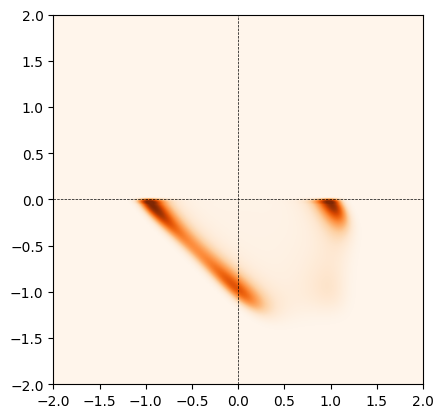

In [171]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + 2*flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.9 Asymmetric channels with 1 full ratchet, different angles and lengths, competition (model_09_A)

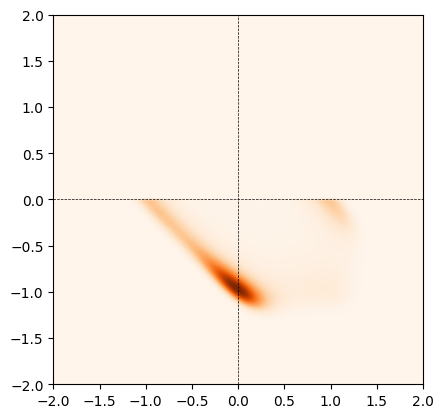

In [172]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (2*flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.10 Fully symmetric channels with 1 partial ratchet (model_10_S)

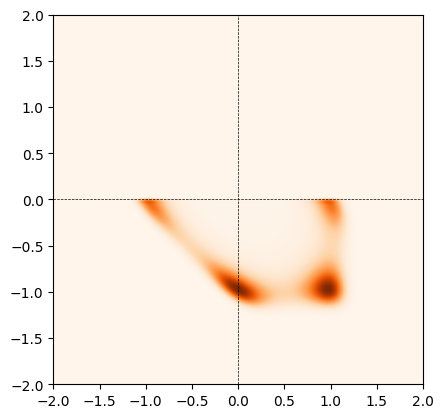

In [173]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + 3*flow_potential(p2, type="v6") + 3*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.11 Fully symmetric straight channels (model_11_S)

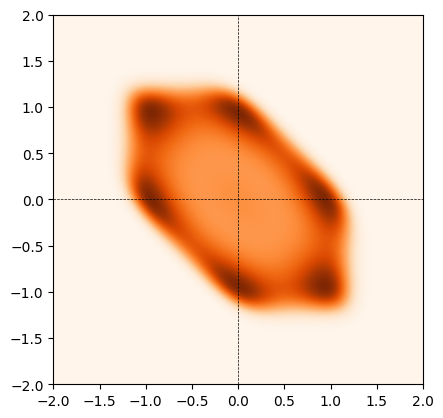

In [174]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.12 Asymmetric (model_12_L)

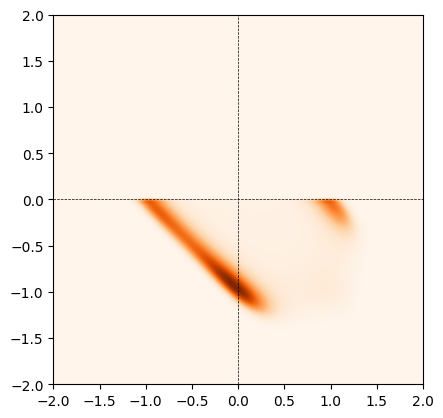

In [177]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.13 Asymmetric (model_13_L)

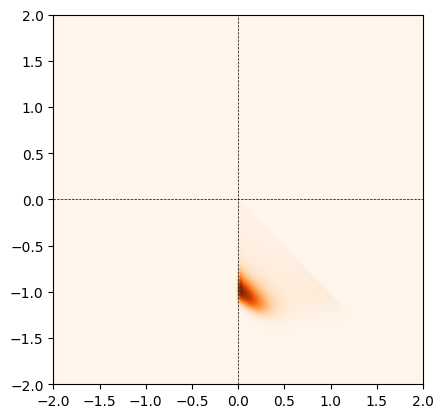

In [178]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1) + h_diode(p2, 1) + h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.14 Asymmetric (model_14_L)

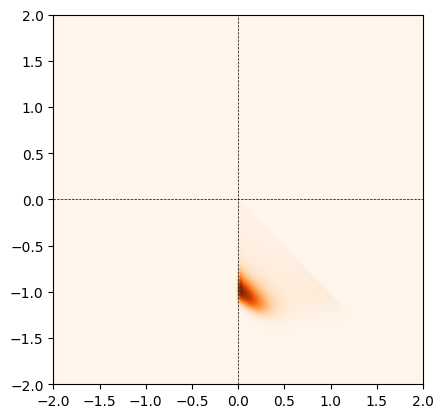

In [179]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1) + h_diode(p2, 1) + h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")